<a href="https://colab.research.google.com/github/beatriz007/data-projects/blob/master/classification_telemarketing_completed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Challenge: Classification Telemarketing Campaign - Completed


We're going to look at a dataset from a bank marketing campaign in which telemarketers contacted existing customers to try and get them to subscribe to a bank term deposit. Of the customers contacted, some of them agreed to a deposit and some didn't - in some cases, contacting the same customer multiple times resulted in an eventual agreement.

You can download the dataset from the course resources - the data originates from a [Kaggle](https://www.kaggle.com/yufengsui/portuguese-bank-marketing-data-set) dataset.

The aim of the problem is to try and predict whether a given customer will agree to the term deposit or not based on what we know about them - this could then be used, for example, to predict the success of a campaign in the future. The data dictinoary is given below:


- Age: The customer's age.
- Job: The customer's type of job.
- maritalStatus: Whether the client is married or not.
- education: What level of education the customer has. Tertiary is a university degree, Secondary is Secondary school.
- defaultedCredit: Whether the customer has borrowed money (on credit) and has defaulted on payments.
- balance: The customer's bank balance at the time of the call.
- housingLoan: Whether the customer has a loan for housing (a mortgage).
- personalLoan: The customer has a personal loan open.
- contactType: Contact communication type, e.g mobile phone or landline.
- day_of_month: Day of Month the call was made.
- month: Month of year the call was made.
- callDuration: Length of last contact, in seconds.
- numberTimesContactedInCampaign: The number of times this customer has been contacted during this telemarketing campaign.
- daysSinceLastContact: Number of days that have past since the customer was last contacted.
- totalTimesContacted: Number of times this customer has been contacted before this campaign started.
- outcomeLastCampaign: The outcome of the previous marketing campaign when this customer was contacted.
- subscribed: Whether or not the customer agreed to subscribe to a term deposit.


The "subscribed" column is the variable that we are trying to predict using whatever classification technique of choice - it is our class variable or label.

We will explore this problem with the range of classification techniques that we have studied throughout this module - along the way, we will also expand upon a few concepts we have touched upon previously.

# Load data

In [ ]:
# import pandas and numpy
import pandas as pd
import numpy as np

# import matplotlib and seaborn for visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# load in the data
data = pd.read_csv('bank-data.csv')

data.head(10)

,Unnamed: 0,age,job,maritalStatus,education,defaultedCredit,balance,housingLoan,personalLoan,contactType,day_of_month,month,callDuration,numberTimesContactedInCampaign,daysSinceLastContact,totalTimesContacted,outcomeLastCampaign,subscribed
0,1,59,admin.,married,secondary,no,2343.0,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,2,56,admin.,married,secondary,no,45.0,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,3,41,technician,married,secondary,no,1270.0,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,4,55,services,married,secondary,no,2476.0,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,5,54,admin.,married,tertiary,no,184.0,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,6,42,management,single,tertiary,no,NaN,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,7,56,management,married,tertiary,no,830.0,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,8,60,retired,divorced,secondary,no,545.0,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,9,37,technician,married,secondary,no,NaN,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,10,28,services,single,secondary,no,5090.0,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


So our class variable is the "subscribed" column - we can confirm it is a binary variable by checking the unique values:

In [ ]:
# check the unique values of our class variable
data['subscribed'].unique()

array(['yes', 'no'], dtype=object)

We can also check the class balance as usual:

In [ ]:
# check the class balance
data["subscribed"].value_counts()

no     5873
yes    5289
Name: subscribed, dtype: int64

We see that the data is indeed very balanced between the 2 classes and so we shouldn't need to utilise any strategies to deal with this.

## Data Cleaning

In [ ]:
# check high level structure of the data using .info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      11162 non-null  int64  
 1   age                             11162 non-null  int64  
 2   job                             11162 non-null  object 
 3   maritalStatus                   11162 non-null  object 
 4   education                       11162 non-null  object 
 5   defaultedCredit                 11162 non-null  object 
 6   balance                         9475 non-null   float64
 7   housingLoan                     11162 non-null  object 
 8   personalLoan                    11162 non-null  object 
 9   contactType                     11162 non-null  object 
 10  day_of_month                    11162 non-null  int64  
 11  month                           11162 non-null  object 
 12  callDuration                    

The data types all look correct.

One of the columns adds no new information (it is just an index) so let's drop it:

In [ ]:
# drop the useless column
data = data.drop(columns = "Unnamed: 0")

The only data missing is in the "balance" column. It is not a huge amount, so we will simply drop it (but you can impute instead if you wish):

In [ ]:
# drop NA values
data = data.dropna()

In [ ]:
# check that there are no missing values now by running .info() again
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9475 entries, 0 to 11159
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             9475 non-null   int64  
 1   job                             9475 non-null   object 
 2   maritalStatus                   9475 non-null   object 
 3   education                       9475 non-null   object 
 4   defaultedCredit                 9475 non-null   object 
 5   balance                         9475 non-null   float64
 6   housingLoan                     9475 non-null   object 
 7   personalLoan                    9475 non-null   object 
 8   contactType                     9475 non-null   object 
 9   day_of_month                    9475 non-null   int64  
 10  month                           9475 non-null   object 
 11  callDuration                    9475 non-null   int64  
 12  numberTimesContactedInCampaign  9

## EDA

Let's perform some basic visualisations to see if we can gain any insight into which features might be important in helping to classify.

For the numerical features it can be useful to look at **boxplots** to see the distributions of the features for each of the 2 class values. We can do this using `sns.boxplot`.

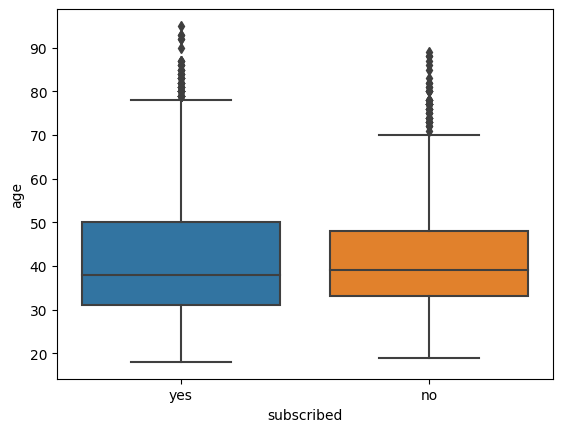

In [ ]:
# boxplot of "age" with "subscribed" on the x-axis
sns.boxplot(y = 'age', x = 'subscribed', data = data)
plt.show()

So "age" does not seem very useful in splitting the classes.

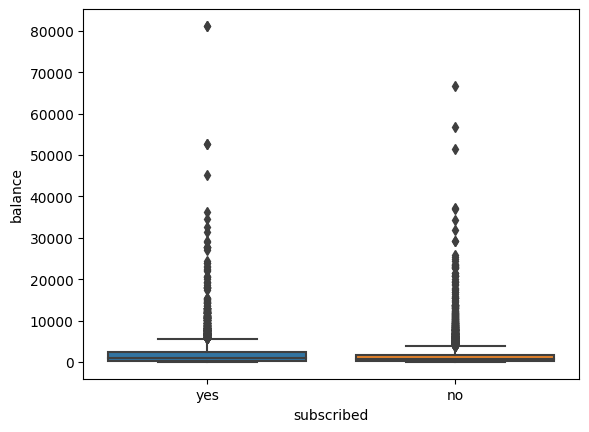

In [ ]:
# boxplot of "balance" with "subscribed" on the x-axis
sns.boxplot(y = 'balance', x = 'subscribed', data = data)
plt.show()

The "balance" variable also doesn't look very useful!

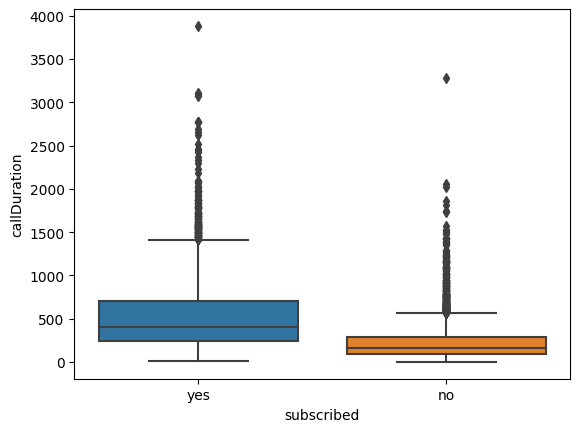

In [ ]:
# boxplot of "callDuration" with "subscribed" on the x-axis
sns.boxplot(y = 'callDuration', x = 'subscribed', data = data)
plt.show()

So it seems like "callDuration" could potentially be quite useful at splitting the classes.

For the categorical features we could look at **barplots** for each categeory using `sns.countplot`, with the `hue` determined by the class:

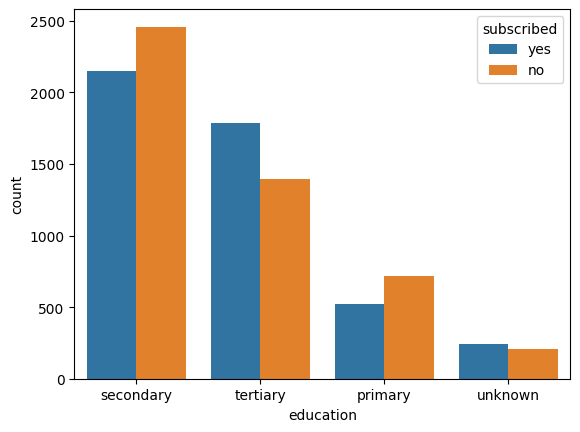

In [ ]:
# countplot of "education" with the hue determined by the class
sns.countplot(x = 'education', hue = 'subscribed', data = data)
plt.show()

It does not seem like a huge amount is shown here.

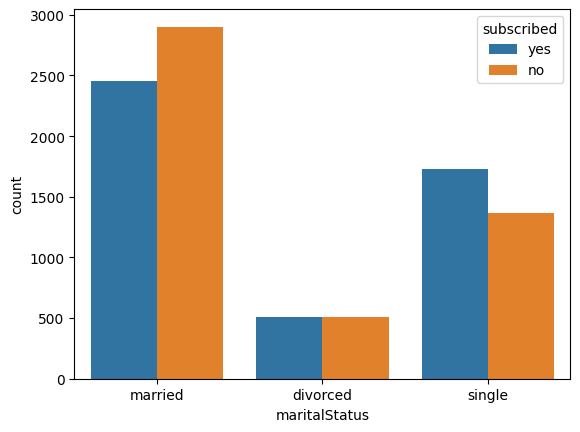

In [ ]:
# countplot of "maritalStatus" with the hue determined by the class
sns.countplot(x = 'maritalStatus', hue = 'subscribed', data = data)
plt.show()

Again, we can't seem to learn a lot from this.

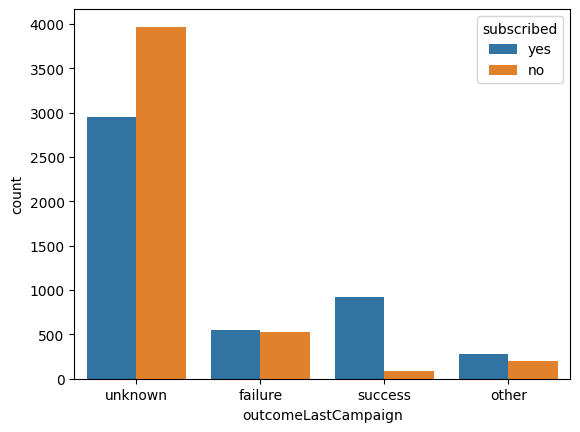

In [ ]:
# countplot of "outcomeLastCampaign" with the hue determined by the class
sns.countplot(x = 'outcomeLastCampaign', hue = 'subscribed', data = data)
plt.show()

However, notice that the "success" category for this variable seems to split the classes quite a lot.

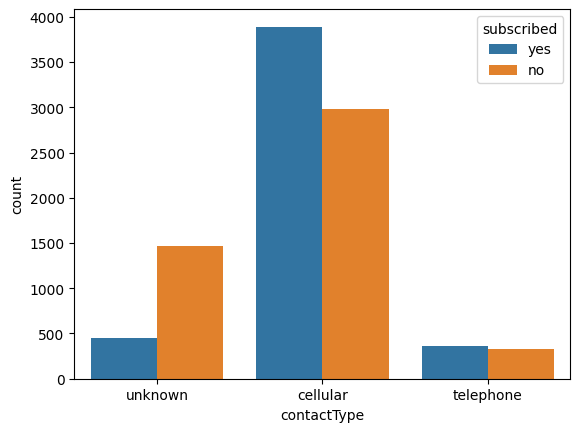

In [ ]:
# countplot of "contactType" with the hue determined by the class
sns.countplot(x = 'contactType', hue = 'subscribed', data = data)
plt.show()

The "unknown" category for this variable seems to split the classes quite well too.

We will see many of these suspicions validated later when we actually build our classification models.

## Preprocessing

We will perform the usual preprocessing that is required for classification analysis:

In [ ]:
# split into features (X) and class (y)
X = data.drop('subscribed', axis = 1)
y = data['subscribed']

In [ ]:
# perform a train/test split with a ratio of 70:30 and a random_state = 123 for example
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [ ]:
# one-hot encode the training features
X_train = pd.get_dummies(X_train)

In [ ]:
# check that one-hot encoding has worked correctly
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6632 entries, 3169 to 4034
Data columns (total 51 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             6632 non-null   int64  
 1   balance                         6632 non-null   float64
 2   day_of_month                    6632 non-null   int64  
 3   callDuration                    6632 non-null   int64  
 4   numberTimesContactedInCampaign  6632 non-null   int64  
 5   daysSinceLastContact            6632 non-null   int64  
 6   totalTimesContacted             6632 non-null   int64  
 7   job_admin.                      6632 non-null   uint8  
 8   job_blue-collar                 6632 non-null   uint8  
 9   job_entrepreneur                6632 non-null   uint8  
 10  job_housemaid                   6632 non-null   uint8  
 11  job_management                  6632 non-null   uint8  
 12  job_retired                    

As before, we will produce a scaled version our training features for use in certain algorithms, using the `StandardScaler` from `sklearn`:

In [ ]:
# scale the training features using StandardScaler
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train)

**Note**: a particularly convenient way to organise your transformations is to make use of [sklearn.pipeline.Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) which lets you construct a sequence of "transforms" (a method that modifies data) followed by a final "estimator" (a method that learns from data) - for a summary of `sklearn` terminology see the start of the documentation [here](https://scikit-learn.org/stable/developers/develop.html). This means that you can construct your transformation pipeline on the training set as a sequence of steps that can be cross-validated together - you can then apply the exact same sequence of transformations later on your test set. As an optional stretch exercise, you may want to try rewriting your preprocessing pipeline by making use of this functionality! We encountered this idea of a transformation pipeline previously in the Workshop when we studied pipelines of resampling techniques using `imblearn.pipeline`.

## Logistic Regression

Let's first run a logistic regression model like we saw previously on the Iris dataset.

In [ ]:
# import LogisticRegression
from sklearn.linear_model import LogisticRegression

# setup a model with default arguments
model_lr = LogisticRegression()

# fit the model to the (scaled) training data
model_lr.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
# make predictions on the scaled train set
y_pred_train = model_lr.predict(X_train_scaled)

In [ ]:
# compute the training accuracy
from sklearn.metrics import accuracy_score

print("Train accuracy: ", accuracy_score(y_train, y_pred_train))

Train accuracy:  0.8222255729794934


Let's now see how the model performs on the test set:

In [ ]:
# perform the same preprocessing on the test set that we used for the train set i.e. one-hot encode and scale
X_test = pd.get_dummies(X_test)
X_test_scaled = sc.transform(X_test)

In [ ]:
# make predictions on the scaled test set
y_pred = model_lr.predict(X_test_scaled)

In [ ]:
# compute the test accuracy
print("Test accuracy: ", accuracy_score(y_test, y_pred))

Test accuracy:  0.8209637706647908


Since we have a binary classification problem we can also easily look at the **precision**, **recall** and **f1-score**:

In [ ]:
# import these metrics from sklearn
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
# compute the precision, recall and f1-score
print("Test precision: ", precision_score(y_test, y_pred, pos_label = 'yes'))
print("Test recall: ", recall_score(y_test, y_pred, pos_label = 'yes'))
print("Test f1-score: ", f1_score(y_test, y_pred, pos_label = 'yes'))

Test precision:  0.8313868613138686
Test recall:  0.8038108680310515
Test f1-score:  0.8173663437387871


So the model is doing quite well, with similar train and test accuracy, and good scores for the other metrics. Is it failing more at predicting one class than the other?

In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_pred, y_test))

[[1195  278]
 [ 231 1139]]


So we see that the classifier has a very even performance across both classes.

We can study the **feature importances** in a crude way by looking at the logistic regression **coefficients**, much like what you did for linear regression models. This can be accessed via the `.coef_` attribute (note the underscore, meaning this can only be accessed after fitting the model as expected):

In [ ]:
# look at the model coefficients
model_lr.coef_

array([[-1.11109839e-02,  7.03759906e-02,  1.95567289e-02,
         1.81204927e+00, -3.01030122e-01, -9.82606155e-03,
         1.08450148e-02,  5.54251270e-02, -7.64099112e-02,
        -3.61781287e-02, -7.41058937e-02, -1.50289144e-03,
         9.27819649e-02, -3.72562715e-02, -5.31142277e-02,
         1.24048749e-01,  1.27519918e-02,  3.54088148e-03,
        -3.47038404e-02,  4.19957353e-02, -5.74494403e-02,
         3.29206599e-02, -4.67651553e-02, -2.82259759e-02,
         5.64239615e-02,  1.55996452e-02,  2.60541183e-02,
        -2.60541183e-02,  1.79014586e-01, -1.79014586e-01,
         9.22801668e-02, -9.22801668e-02,  2.37736259e-01,
         9.85730960e-02, -3.29329812e-01,  8.39039127e-02,
        -1.16148859e-01,  2.04101068e-01,  6.23037549e-02,
        -1.54697952e-01, -1.93761764e-01,  1.37849197e-01,
         3.33848492e-01, -1.61563933e-01, -1.45065801e-01,
         2.55296901e-01,  2.21300570e-01, -1.12666584e-01,
        -4.54626574e-02,  5.81365008e-01, -2.99880437e-0

Clearly the most important feature here is the 4th feature ("callDuration") which has the largest coefficient - we will see this verified later by decision tree methods. We also discussed how to interpret these coefficients briefly in the online content - you exponentiate the coefficient to get the increase in the odds for a unit increase in the corresponding feature.

#### ROC Curves and the Decision Threshold

Recall that we previously introduced a tool called the **receiver operating characteristic (ROC) curve**, which is a plot of the true positive rate (TPR) against the false positive rate (FPR) for each possible value of the decision threshold. The ROC curve can be used to select the optimal choice of classification threshold, by finding the sweet spot where the TPR is high and the FPR is low, as we will demonstrate below.

The ROC curve and the area under it (AUC) can all be implemented using a couple of functions from the `sklearn.metrics` library as you saw in the Workshop. In particular, `roc_curve` computes the TPR and FPR for a variety of thresholds (which could then be plotted), and `auc` computes the area under the ROC curve:

In [ ]:
# import roc_curve and auc
from sklearn.metrics import roc_curve, auc

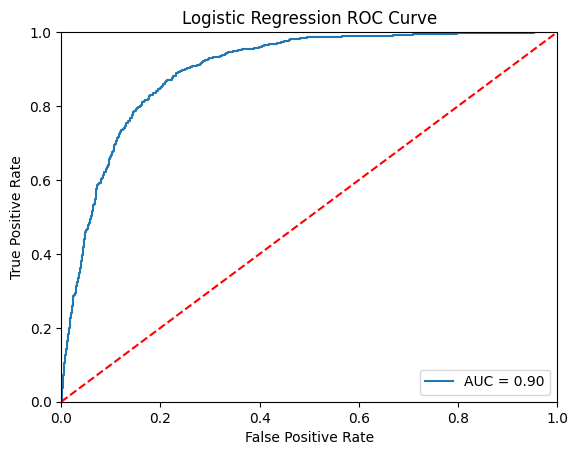

In [ ]:
# generate the probabilities with predict_proba
y_probs = model_lr.predict_proba(X_test_scaled)

# extract the probabilities for the second class
preds = y_probs[:,1]

# generate the roc_curve
fpr, tpr, threshold = roc_curve(y_test, preds, pos_label = 'yes')

# compute the AUC
roc_auc = auc(fpr, tpr)

# plot the roc_curve with the AUC value in the legend
plt.title('Logistic Regression ROC Curve')
plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot([0, 1], [0, 1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

So we might pick the threshold such that the TPR is about 0.9 and the FPR is about 0.35, which seems like quite a good performance (we also see that the classifier has AUC = 0.9 which indicates a good score). To do this, we can set a user threshold, and then compare the probability of the second class to this threshold (just like in the default case where the probability of the second class is compared to 0.5):

In [ ]:
# set a user threshold of e.g. 0.6
user_threshold = 0.6

# compare (using >) the model probabilities for class B to this value
model_lr.predict_proba(X_test_scaled)[:,1] > user_threshold

array([ True,  True,  True, ..., False,  True, False])

and so this returns a list of `True` and `False` values that we can replace with "yes" and "no" for our class predictions.

The TPR is simply the recall, so we can try tweaking the threshold, using the resulting model to make predictions, and computing the recall until we find the desired value:

In [ ]:
# select a threshold
user_threshold = 0.8

# compare the probability of the second class to the threshold
y_pred = model_lr.predict_proba(X_test_scaled)[:,1] > user_threshold

# convert this numpy array to a pandas series
y_pred = pd.Series(y_pred)

# replace the values [True, False] with the class values ['yes', 'no']
y_pred = y_pred.replace([True, False], ['yes', 'no'])

# compute the recall
recall_score(y_pred, y_test, pos_label = 'yes')

0.8916876574307305

We can calculate the FPR = 1 - TNR, where the TNR (True Negative Rate) is also known as the **specificity** and is simply the recall for the *negative* class:

In [ ]:
# compute the FPR = 1 - TNR
1 - recall_score(y_pred, y_test, pos_label = 'no')

0.34602244997559783

So we find that in this case we might have wanted to pick a threshold of 0.8 for example.

#### Precision-Recall Curve vs. ROC Curve

We have mentioned that the ROC curve can be one way to evaluate a classifier and select the decision threshold, but you may remember from the Introduction work that we also discussed the **precision-recall curve** with similar intentions. So which should we use in general? Generally, ROC curves are useful when the classes are fairly balanced, whereas precision-recall curves should be used when there is a substantial class imbalance, since ROC curves tend to give an overly-optimistic measure of classifier performance when the dataset is imbalanced (for more details, see the article [here](https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/)).

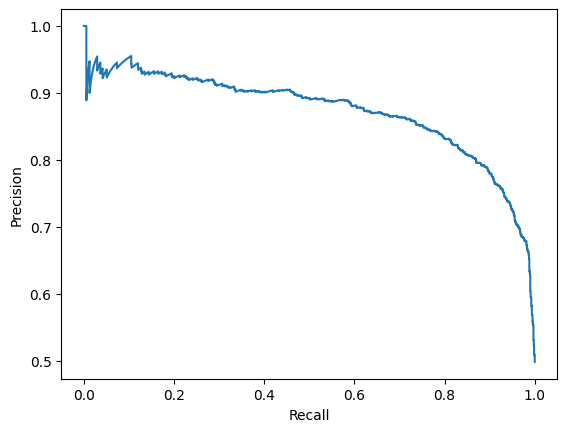

In [ ]:
# import the precision_recall_curve
from sklearn.metrics import precision_recall_curve

# unpack the precision and recall values into variables
lr_precision, lr_recall, _  = precision_recall_curve(y_test, preds, pos_label = 'yes')

# plot the precision-recall curve
plt.plot(lr_recall, lr_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

We can see the **precision-recall tradeoff** clearly here - as one goes up, the other goes down. We can however also see where the ideal threshold might lie i.e. on the right side of the graph where both precision and recall are quite high. For example, there is a point where both precision and recall are between 0.8-0.85, which we found before is when the threshold is around the default 0.5. Similarly to what we did with the ROC curve, this precision-recall curve could be used instead to tweak the decision threshold if desired (especially in cases where there is a substantial class imbalance).

## (Optional) Trying to improve Model Performance with Correlation Analysis

> This section is **optional** - if you do not wish to do it, skip ahead to the section on k-NN.

One way to try and improve model performance is study the **correlation** in the features and remove highly correlated features. Highly correlated features can cause lower performance in certain classification algorithms just as they can in regression (though non-parametric models such as decision trees are not so badly affected) because the feature redunancy, relative to how much data there is, might increase the chance of overfitting. As such, it can sometimes be useful to remove some of the correlated features (or to use dimensionality reduction techniques such as **Principal Component Analysis**).

Recall that the correlation between two variables is a measure of how one variable changes as the other one does. There are several possible metrics for quantifying this - most commonly is something known as the **r-coefficient** (also known as the correlation coefficient or product moment correlation coefficient, among other things!). The formula for this is given by the covariance of the 2 variables ($x$ and $y$) divided by the product of their standard deviations:

$r_{xy} = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sigma_x \sigma_y} $

where $\bar{x}$, $\bar{y}$ are the means, and $n$ is the size of the dataset. The r-coefficient is a number between -1 and 1. If there is a strong positive correlation then the r-coefficient will be close to 1, whereas if there is a strong negative correlation (one variable goes up as the other goes down) then the r-coefficient will be close to -1. A value close to zero indicates almost no (linear) correlation.

Remember during your statistics module that we talked about hypothesis testing. An important thing to determine for us is here is not just what the correlation coefficient is, but whether a correlation is *statistically significant* or not i.e. not just due to chance. We can assess this using the **Pearson correlation test** - This calculates the **p-value**, which recall is the probability of observing the current result (in this case the r-coefficient) given that there is in fact no significant correlation i.e. the result is purely due to chance (this is our *null hypothesis*). If that probability is tiny, then the correlation is indeed significant and it is not due to chance. As you saw before, a p-value less than 0.05 is usually considered small enough to reject the null hypothesis that the correlation is due to chance.

> *Note that the p-value is not related to the strength of the correlation as measured by the r-coefficient - it only tells us whether a correlation is due to chance or not. Sometimes you can observe r-coefficients very close to zero but with p-values that suggest that the correlation is not due to chance, whereas in other cases r-coefficients can be very large in magnitude (close to -1 or 1), but with non-significant p-values.*

To this end we can use the `.corr_pair` function from the library `researchpy` - this generates a matrix showing for each pair of variables the r-coefficient and the p-value of the correlation. With this, it is possible to check how many of the correlations are both high ($r > 0.5$ or $r < -0.5$) and significant ($p < 0.05$).

In [ ]:
pip install researchpy

In [ ]:
import researchpy as rp

# run corr_pair on the training features
corr_table = rp.corr_pair(X_train)

# inspect the results with .head()
corr_table.head()

,r value,p-value,N
age & balance,0.1277,0.0000,6632
age & day_of_month,-0.0023,0.8484,6632
age & callDuration,0.0074,0.5442,6632
age & numberTimesContactedInCampaign,-0.0011,0.9265,6632
age & daysSinceLastContact,0.0050,0.6865,6632


import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_0, *['r value'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_1, *['p-value'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_2, *['r value', 'p-value'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_3, *['N', 'count()', 'r value'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_4, *['N', 'count()', 'p-value'], **{})
chart

We can inspect the structure of this output with `.info`:

In [ ]:
corr_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1275 entries, age & balance to outcomeLastCampaign_success & outcomeLastCampaign_unknown
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   r value  1275 non-null   object
 1   p-value  1275 non-null   object
 2   N        1275 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 72.1+ KB


Note that the r-coefficient and p-value are not numeric values by default. We can use `pd.to_numeric` to rectify this however:

In [ ]:
# convert the 'p-value' and 'r value' columns to numeric types
corr_table['p-value'] = pd.to_numeric(corr_table['p-value'])
corr_table['r value'] = pd.to_numeric(corr_table['r value'])

Now let's look at only those correlations that are high (either positive or negative) and significant:

In [ ]:
# filter only those rows such that r < -0.5 or r > 0.5, and p < 0.05
corr_table[((corr_table['r value']  < -0.5) | (corr_table['r value'] > 0.5)) & (corr_table['p-value'] < 0.05)]

,r value,p-value,N
age & job_retired,0.5692,0.0,6632
daysSinceLastContact & outcomeLastCampaign_failure,0.5830,0.0,6632
daysSinceLastContact & outcomeLastCampaign_unknown,-0.8186,0.0,6632
totalTimesContacted & outcomeLastCampaign_unknown,-0.6062,0.0,6632
job_management & education_tertiary,0.5927,0.0,6632
maritalStatus_married & maritalStatus_single,-0.7947,0.0,6632
education_secondary & education_tertiary,-0.6944,0.0,6632
defaultedCredit_no & defaultedCredit_yes,-1.0000,0.0,6632
housingLoan_no & housingLoan_yes,-1.0000,0.0,6632
personalLoan_no & personalLoan_yes,-1.0000,0.0,6632


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_5, *['r value'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_6, *['r value'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_7, *['p-value', 'r value', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_8, *['p-value', 'count()', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_9, *['N', 'r value', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_10, *['N', 'count()', None], **{})
chart

There are a number of significant correlations above. Let's try dropping a couple of these features and rerunning our logistic regression models:

In [ ]:
# drop the correlated features from the train and test sets
X_train_2 = X_train.drop(['contactType_cellular', 'daysSinceLastContact', 'personalLoan_no'], axis = 1)
X_test_2 = X_test.drop(['contactType_cellular', 'daysSinceLastContact', 'personalLoan_no'], axis = 1)


# scale the new train and test sets
sc = StandardScaler()
X_train_scaled_2 = sc.fit_transform(X_train_2)
X_test_scaled_2 = sc.fit_transform(X_test_2)

# create the model
model = LogisticRegression()

# fit the model to the (scaled) training data
model.fit(X_train_scaled_2, y_train)

# make predictions on the (scaled) test data
y_pred = model.predict(X_test_scaled_2)

In [ ]:
# compute the various metrics on the test set
print("Test accuracy: ", accuracy_score(y_test, y_pred))
print("Test precision: ", precision_score(y_test, y_pred, pos_label = 'yes'))
print("Test recall: ", recall_score(y_test, y_pred, pos_label = 'yes'))
print("Test f1-score: ", f1_score(y_test, y_pred, pos_label = 'yes'))

Test accuracy:  0.822018994020401
Test precision:  0.8327246165084002
Test recall:  0.8045165843330981
Test f1-score:  0.8183776022972002


By simply removing these 3 features, we see a very slight improvement in the model on all metrics. You might want to play around more with this to see if you can get a futher improvement.

## k-Nearest Neighbours

For completeness, let's now use some of the other classification methods that we have learnt about to see how their performance compares:

In [ ]:
# import the KNeighborsClassifier class from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

Let's choose the hyperparamater values using `GridSearchCV` as we have seen previously:

In [ ]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV

# define the paramater grid with a few distance metrics (e.g. 'minkowski', 'manhattan', and 'chebyshev')
# and a selection of k values between 1 and 10
param_grid = [
        {'metric': ['minkowski', 'manhattan', 'chebyshev'],
         'n_neighbors': [1, 2, 3, 5, 7, 9]},
]

# setup the k-NN model with all arguments as default
model_knn = KNeighborsClassifier()

# pass the model and the param_grid to the grid search using 5 folds and 'accuracy' for the scoring
grid_search = GridSearchCV(model_knn, param_grid, cv = 5, scoring = 'accuracy')

# fit the grid search to the (scaled) training set
grid_search.fit(X_train_scaled, y_train)

# return the hyperparameter values of the best model
grid_search.best_params_

{'metric': 'manhattan', 'n_neighbors': 7}

In [ ]:
# save the best_estimator_ into a variable
model_knn = grid_search.best_estimator_

# use the model to make predictions on the (scaled) train set
y_pred_train = model_knn.predict(X_train_scaled)

# compute the accuracy on the train set
print("Train accuracy: ", accuracy_score(y_train, y_pred_train))

Train accuracy:  0.8136308805790109


In [ ]:
# make predictions on the scaled test set
y_pred = model_knn.predict(X_test_scaled)

# compute the various metrics on on the test set
print("Test accuracy: ", accuracy_score(y_pred, y_test))
print("Test precision: ", precision_score(y_pred, y_test, pos_label = 'yes'))
print("Test recall: ", recall_score(y_pred, y_test, pos_label = 'yes'))
print("Test f1-score: ", f1_score(y_pred, y_test, pos_label = 'yes'))

Test accuracy:  0.7537812170242701
Test precision:  0.6817219477769937
Test recall:  0.7950617283950617
Test f1-score:  0.7340425531914895


We can generate an ROC curve for this k-NN classifier identically to how we did for our logistic regression model:

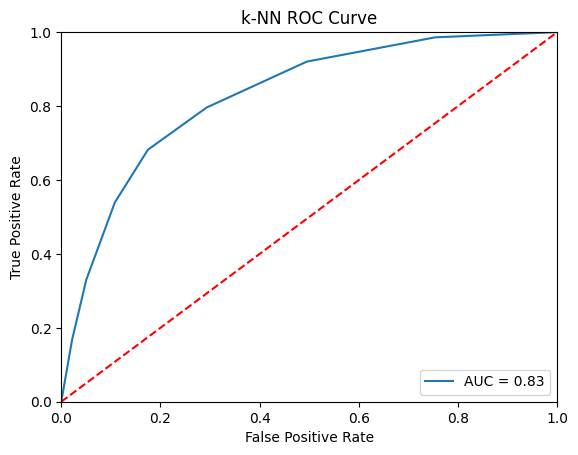

In [ ]:
# generate the probabilities with predict_proba
y_probs = model_knn.predict_proba(X_test_scaled)

# extract the probabilities for the second class
preds = y_probs[:,1]

# generate the roc_curve
fpr, tpr, threshold = roc_curve(y_test, preds, pos_label = 'yes')

# compute the AUC
roc_auc = auc(fpr, tpr)

# plot the roc_curve with the AUC value in the legend
plt.title('k-NN ROC Curve')
plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot([0, 1], [0, 1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Decision Trees

Let's recall the first classification technique we learnt about - **decision trees**. We can also see how these models performs on our dataset. Unlike logistic regression and k-NN, decision trees don't generally need scaling and so we can skip this preprocessing step.

In [ ]:
# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# define a parameter grid by choosing some values to be tested for just the criterion and max_depth arguments
# e.g. let criterion be 'gini' or 'entropy', and max_depth be [2,5,10,15]
param_grid = [
        {'criterion': ['gini', 'entropy'],
         'max_depth': [2, 5, 10, 15]},
]

# setup the model with all arguments as default
model = DecisionTreeClassifier()

# pass the model and the param_grid to the grid search
grid_search = GridSearchCV(model, param_grid, cv = 5, scoring = 'accuracy')

# fit the grid search to the training set
grid_search.fit(X_train, y_train)

# return the hyperparameter values of the best model
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 10}

At this point, you could then **iterate** the grid search to see if you can tune the hyperparameters even better (but you can verify for yourself that `max_depth = 10` is indeed the best value in this case).

In [ ]:
# return the best model and save it into a variable
model_tree = grid_search.best_estimator_

# use the model to make predictions on the test set
y_pred = model_tree.predict(X_test)

# compute the various metrics on the test set
print("Test accuracy: ", accuracy_score(y_test, y_pred))
print("Test precision: ", precision_score(y_test, y_pred, pos_label = 'yes'))
print("Test recall: ", recall_score(y_test, y_pred, pos_label = 'yes'))
print("Test f1-score: ", f1_score(y_test, y_pred, pos_label = 'yes'))

Test accuracy:  0.8213155117833275
Test precision:  0.810663021189337
Test recall:  0.8369795342272407
Test f1-score:  0.8236111111111112


So this decision tree is performing pretty well - similar to our logistic regression model (and both better than our k-NN model), so we may want to use either of these models for future predictions on new data. As always, it is good to check the performance on the *train* set too to ensure our model is not massively overfitting:

In [ ]:
y_pred_train = model_tree.predict(X_train)

# compute the various metrics on the train set
print("Train accuracy: ", accuracy_score(y_train, y_pred_train))
print("Train precision: ", precision_score(y_train, y_pred_train, pos_label = 'yes'))
print("Train recall: ", recall_score(y_train, y_pred_train, pos_label = 'yes'))
print("Train f1-score: ", f1_score(y_train, y_pred_train, pos_label = 'yes'))

Train accuracy:  0.883745476477684
Train precision:  0.8683284457478005
Train recall:  0.9019189765458422
Train f1-score:  0.8848050201703271


So there is a slightly better performance on the train set as is often expected.

We can visualise the tree using `graphviz` as we saw previously:

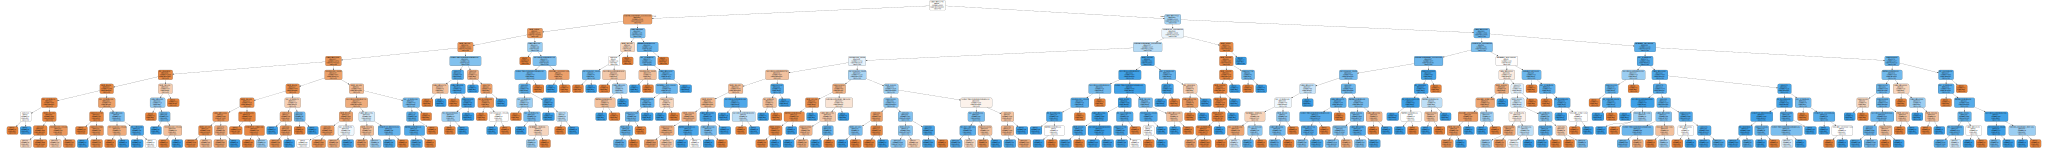

In [ ]:
# visualise the tree using the graphviz code that you saw in the Introduction for this module
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(model_tree, out_file = None, filled = True, rounded = True,
                           special_characters = True, feature_names = X_train.columns,
                           class_names = model_tree.classes_)

graph = graphviz.Source(dot_data)
graph

Recall that we can also view the feature importances from a decision tree model, by using the `.feature_importances_` attribute. This calculates feature importance by calculating the total impurity decrease for nodes in the tree involving that feature, and then normalising these scores.

In [ ]:
# compute the feature importances
model_tree.feature_importances_

array([4.18168670e-02, 3.21815036e-02, 3.15504932e-02, 4.31675717e-01,
       1.45544211e-02, 2.22854097e-02, 9.05059623e-03, 1.92836426e-03,
       1.04934739e-03, 4.54993935e-04, 1.32721292e-03, 6.21825044e-04,
       3.94619740e-04, 8.47943242e-04, 1.14260352e-03, 4.11844001e-03,
       2.28176951e-03, 0.00000000e+00, 7.07205358e-04, 2.27339819e-03,
       1.31650880e-03, 1.86621540e-03, 1.08584858e-03, 1.21255884e-03,
       1.24365009e-03, 6.61646353e-04, 6.39591474e-04, 0.00000000e+00,
       4.29633507e-02, 2.63932080e-03, 1.49956506e-02, 1.16592196e-03,
       1.15688380e-03, 2.23245476e-03, 1.03859930e-01, 1.46165540e-02,
       1.23180662e-02, 0.00000000e+00, 1.01084229e-02, 6.57719135e-03,
       6.34000640e-04, 8.74418779e-03, 2.33138920e-02, 5.40930929e-03,
       5.31705009e-03, 2.28552567e-02, 7.53190230e-03, 1.99436251e-03,
       1.24365009e-03, 1.02033892e-01, 0.00000000e+00])

We can organise these scores into a more useful format by rounding them and pairing them with the feature names (and plotting them if desired):

age - 0.04182
balance - 0.03218
day_of_month - 0.03155
callDuration - 0.43168
numberTimesContactedInCampaign - 0.01455
daysSinceLastContact - 0.02229
totalTimesContacted - 0.00905
job_admin. - 0.00193
job_blue-collar - 0.00105
job_entrepreneur - 0.00045
job_housemaid - 0.00133
job_management - 0.00062
job_retired - 0.00039
job_self-employed - 0.00085
job_services - 0.00114
job_student - 0.00412
job_technician - 0.00228
job_unemployed - 0.00000
job_unknown - 0.00071
maritalStatus_divorced - 0.00227
maritalStatus_married - 0.00132
maritalStatus_single - 0.00187
education_primary - 0.00109
education_secondary - 0.00121
education_tertiary - 0.00124
education_unknown - 0.00066
defaultedCredit_no - 0.00064
defaultedCredit_yes - 0.00000
housingLoan_no - 0.04296
housingLoan_yes - 0.00264
personalLoan_no - 0.01500
personalLoan_yes - 0.00117
contactType_cellular - 0.00116
contactType_telephone - 0.00223
contactType_unknown - 0.10386
month_apr - 0.01462
month_aug - 0.01232
month_dec - 0.00000
mon

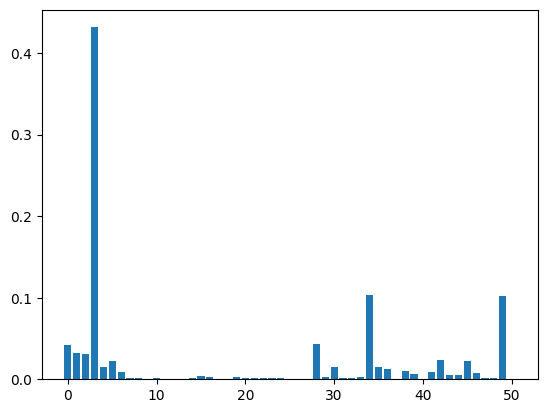

In [ ]:
# save the feature importances into a variable
importances = model_tree.feature_importances_

# round the feature importances and pair them with the feature names
for i,v in enumerate(importances):
    print(X_train.columns[i], '- %.5f' % (v))

# plot the feature importances
plt.bar([x for x in range(len(importances))], importances)
plt.show()

By far, the most important feature is "callDuration", followed by "outcomeLastCampaign_success", "contactType_unknown", and "housingLoan_no". Some of these insights were hinted at earlier from our visualisations in the EDA phase.

## Ethical Considerations

Note that some of these features above might seem quite personal, such as Age, maritalStatus, education and so on. How comfortable would you be with someone making predictions about your potential future actions based on information such as this? Just because you can, it doesn't mean that you always *should* use particular variables in a predictive problem - there may also be legislative and ethical considerations. However, as you are probably aware, removing bias from data is not as simple as just removing certain features, because those features might be *correlated* with other features due to a number of reasons, including underlying social or cultural biases. This is an important consideration when doing data science with integrity.